In [145]:
import pandas as pd
import numpy as np
import os
import tqdm
from os import listdir
import librosa
import soundfile as sf
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import wave, sys

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras


In [5]:

directory = "C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files"


In [6]:
content = listdir(directory)

In [7]:
patient_lung_data = []
l = [s for s in content if '.txt' in s]
for i in l:
  for lines in open(directory+'/'+i,'r').readlines():
    patient_lung_data.append([i.split('.')[0].split("_")[0],i.split('.')[0],lines.split()[0],lines.split()[1],lines.split()[2],lines.split()[3]])

In [8]:
def patient(x):
  patient_list = []
  patient_id = x.split('.')[0].split("_")[0]
  recording_index = x.split('.')[0].split("_")[1]
  chest_location = x.split('.')[0].split("_")[2]
  acquisition_mode = x.split('.')[0].split("_")[3]
  recording_equipment = x.split('.')[0].split("_")[4]
  filename = x.split('.')[0]

  patient_list.append(patient_id)
  patient_list.append(recording_index)
  patient_list.append(chest_location)
  patient_list.append(acquisition_mode)
  patient_list.append(recording_equipment)
  patient_list.append(filename)

  return patient_list



In [9]:

df = [patient(s) for s in content if '.txt' in s]
df[0:5]

[['101', '1b1', 'Al', 'sc', 'Meditron', '101_1b1_Al_sc_Meditron'],
 ['101', '1b1', 'Pr', 'sc', 'Meditron', '101_1b1_Pr_sc_Meditron'],
 ['102', '1b1', 'Ar', 'sc', 'Meditron', '102_1b1_Ar_sc_Meditron'],
 ['103', '2b2', 'Ar', 'mc', 'LittC2SE', '103_2b2_Ar_mc_LittC2SE'],
 ['104', '1b1', 'Al', 'sc', 'Litt3200', '104_1b1_Al_sc_Litt3200']]

In [10]:
data = pd.DataFrame(df)

In [11]:
data.columns = ['patient_id','recording_index','chest_location','acquisition_mode','recording_equipment' ,'filename']

In [12]:
data.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200


In [13]:
print(data['chest_location'].unique())
print(data['recording_equipment'].unique())
print(data['recording_index'].unique() )

['Al' 'Pr' 'Ar' 'Ll' 'Lr' 'Pl' 'Tc']
['Meditron' 'LittC2SE' 'Litt3200' 'AKGC417L']
['1b1' '2b2' '2b1' '2b3' '2b4' '2b5' '3p2' '1p1' '1b2' '1b3' '1b4' '1p2'
 '1p3' '1p4' '2p3' '2p5' '3b3' '3b4' '3p3' '3p4' '2p2' '2p4' '3b2' '8p3'
 '4b4' '5b3' '8b3' '1b5' '1b6' '7b3' '6p1' '7p5' '4b2' '1p5']


In [14]:
data[:10]

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200
5,104,1b1,Ar,sc,Litt3200,104_1b1_Ar_sc_Litt3200
6,104,1b1,Ll,sc,Litt3200,104_1b1_Ll_sc_Litt3200
7,104,1b1,Lr,sc,Litt3200,104_1b1_Lr_sc_Litt3200
8,104,1b1,Pl,sc,Litt3200,104_1b1_Pl_sc_Litt3200
9,104,1b1,Pr,sc,Litt3200,104_1b1_Pr_sc_Litt3200


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    object
 1   recording_index      920 non-null    object
 2   chest_location       920 non-null    object
 3   acquisition_mode     920 non-null    object
 4   recording_equipment  920 non-null    object
 5   filename             920 non-null    object
dtypes: object(6)
memory usage: 43.3+ KB


In [16]:
lung_data = pd.DataFrame(patient_lung_data)
lung_data.head()

,0,1,2,3,4,5
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [17]:
lung_data.columns = ['patient_id','filename','start','end','crackles','wheezes']

In [18]:
lung_data.head(10)

,patient_id,filename,start,end,crackles,wheezes
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0
5,101,101_1b1_Al_sc_Meditron,7.521,9.279,0,0
6,101,101_1b1_Al_sc_Meditron,9.279,11.15,0,0
7,101,101_1b1_Al_sc_Meditron,11.15,13.036,0,0
8,101,101_1b1_Al_sc_Meditron,13.036,14.721,0,0
9,101,101_1b1_Al_sc_Meditron,14.721,16.707,0,0


In [19]:
datay = data.merge(lung_data, how = 'outer',on = 'patient_id' and  'filename')
datay

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [20]:
datay.drop_duplicates()

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [21]:
patient_demographic = pd.read_csv('C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/patient_diagnosis.csv')
patient_demographic.head(10)

,101,URTI
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD
5,107,COPD
6,108,LRTI
7,109,COPD
8,110,COPD
9,111,Bronchiectasis


In [22]:
patient_demographic.columns = ['patient_id','disease']

In [23]:
patient_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  125 non-null    int64 
 1   disease     125 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [24]:
c1 = pd.DataFrame({'patient_id':[101],
                   'disease':['URTI']})
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  1 non-null      int64 
 1   disease     1 non-null      object
dtypes: int64(1), object(1)
memory usage: 148.0+ bytes


In [25]:
patient_demographic = pd.concat([patient_demographic,c1])

In [26]:
patient_demographic['patient_id'].unique()

array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 101], dtype=int64)

In [27]:
datay = datay.drop('patient_id_y',axis= 1)

In [28]:
datay.rename(columns = {'patient_id_x':'patient_id'}, inplace = True)

In [29]:
datay.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [30]:
daty = datay.convert_dtypes()

In [31]:
datay['patient_id'] = datay['patient_id'].astype('int64')

In [32]:
datay['start'] = datay['start'].astype('float64')
datay['end'] = datay['end'].astype('float64')
datay['crackles'] = datay['crackles'].astype('int64')
datay['wheezes'] = datay['wheezes'].astype('int64')

In [33]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           6898 non-null   int64  
 1   recording_index      6898 non-null   object 
 2   chest_location       6898 non-null   object 
 3   acquisition_mode     6898 non-null   object 
 4   recording_equipment  6898 non-null   object 
 5   filename             6898 non-null   object 
 6   start                6898 non-null   float64
 7   end                  6898 non-null   float64
 8   crackles             6898 non-null   int64  
 9   wheezes              6898 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 539.0+ KB


In [34]:
def recording_to_clips(root, start, end, sr = 44100):

  maximum_index = len(root)
  start_index = min(int(start*sr), maximum_index)
  end_index = min(int(end*sr), maximum_index)
  return root[start_index:end_index]

In [35]:
os.makedirs('/content/sample_data/processed_clips')

In [36]:
i = 0
n = 0
for index, rows in tqdm.tqdm(datay.iterrows()):
  max_length = 6
  start_time = rows['start']
  end_time = rows['end']
  filename = rows['filename']

  if end_time - start_time > max_length:
    end = start_time + max_length

  audio_file_path = directory + '/' + filename + '.wav'

  if index > 0:
    if datay.iloc[index-1]['filename'] == filename:
      i += 1
    else:
      i = 0

  filename = filename + '_' + str(i) + '.wav'
  save_path = '/content/sample_data/processed_clips/'+filename
  n += 1

  audio, sample_rate = librosa.load(audio_file_path)
  sample = recording_to_clips(audio,start_time,end_time,sample_rate)

  required_length = max( 6*sample_rate, len(sample))
  padded_data = librosa.util.pad_center(sample,size = required_length)

  sf.write(file = save_path,data = padded_data, samplerate = sample_rate)

  # print('total files processed:', n)

6898it [01:47, 64.18it/s] 


In [37]:
path = '/content/sample_data/processed_clips/'


In [38]:
lll = [[s.split("_")[0],s] for s in os.listdir(path = path)]
patient_data = pd.DataFrame(lll,columns = ['patient_id','filename'])
patient_data

,patient_id,filename
0,101,101_1b1_Al_sc_Meditron_0.wav
1,101,101_1b1_Al_sc_Meditron_1.wav
2,101,101_1b1_Al_sc_Meditron_10.wav
3,101,101_1b1_Al_sc_Meditron_11.wav
4,101,101_1b1_Al_sc_Meditron_2.wav
...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav


In [39]:
patient_data['patient_id'] = patient_data['patient_id'].astype('int64')

In [40]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  6898 non-null   int64 
 1   filename    6898 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.9+ KB


In [41]:
final_data = patient_data.merge(patient_demographic, how = 'outer', on = 'patient_id')
final_data

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.wav,URTI
1,101,101_1b1_Al_sc_Meditron_1.wav,URTI
2,101,101_1b1_Al_sc_Meditron_10.wav,URTI
3,101,101_1b1_Al_sc_Meditron_11.wav,URTI
4,101,101_1b1_Al_sc_Meditron_2.wav,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav,Pneumonia


In [149]:
final_data[final_data['disease'] == 'URTI']

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.wav,URTI
1,101,101_1b1_Al_sc_Meditron_1.wav,URTI
2,101,101_1b1_Al_sc_Meditron_10.wav,URTI
3,101,101_1b1_Al_sc_Meditron_11.wav,URTI
4,101,101_1b1_Al_sc_Meditron_2.wav,URTI
...,...,...,...
6220,210,210_1b1_Ar_sc_Meditron_5.wav,URTI
6221,210,210_1b1_Ar_sc_Meditron_6.wav,URTI
6222,210,210_1b1_Ar_sc_Meditron_7.wav,URTI
6223,210,210_1b1_Ar_sc_Meditron_8.wav,URTI


In [42]:
final_data[['disease']].value_counts()

disease       
COPD              5746
Healthy            322
Pneumonia          285
URTI               243
Bronchiolitis      160
Bronchiectasis     104
LRTI                32
Asthma               6
Name: count, dtype: int64

In [43]:
def get_features_from_audio(path):
    soundArr,sample_rate= librosa.load(path)
    mfcc=librosa.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=librosa.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=librosa.feature.melspectrogram(y=soundArr,sr=sample_rate)
    tone = librosa.feature.tonnetz(y=soundArr,sr=sample_rate)
    specCen = librosa.feature.spectral_centroid(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec,tone, specCen

In [44]:
from PIL import Image

In [45]:
os.mkdir('/content/sample_data/mfcc_processed_images')

In [46]:
def store_img(dir_path,feature,filename):
    s_img = librosa.power_to_db(feature)
    img = Image.fromarray(s_img)
    img = img.convert('L')
    img.save(os.path.join(dir_path,filename+'.png'))

In [47]:
root = '/content/sample_data/processed_clips/'
mfcc_dir = '/content/sample_data/mfcc_processed_images/'


for idx,row in tqdm.tqdm(final_data.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    store_img(mfcc_dir,a,row['filename'].split('.')[0])

0it [00:00, ?it/s]c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
6898it [30:33,  3.76it/s]


In [48]:
dir = '/content/sample_data/mfcc_processed_images/'

In [49]:
mfcc_content = os.listdir(dir)

In [50]:
print(mfcc_content)

['101_1b1_Al_sc_Meditron_0.png', '101_1b1_Al_sc_Meditron_1.png', '101_1b1_Al_sc_Meditron_10.png', '101_1b1_Al_sc_Meditron_11.png', '101_1b1_Al_sc_Meditron_2.png', '101_1b1_Al_sc_Meditron_3.png', '101_1b1_Al_sc_Meditron_4.png', '101_1b1_Al_sc_Meditron_5.png', '101_1b1_Al_sc_Meditron_6.png', '101_1b1_Al_sc_Meditron_7.png', '101_1b1_Al_sc_Meditron_8.png', '101_1b1_Al_sc_Meditron_9.png', '101_1b1_Pr_sc_Meditron_0.png', '101_1b1_Pr_sc_Meditron_1.png', '101_1b1_Pr_sc_Meditron_10.png', '101_1b1_Pr_sc_Meditron_2.png', '101_1b1_Pr_sc_Meditron_3.png', '101_1b1_Pr_sc_Meditron_4.png', '101_1b1_Pr_sc_Meditron_5.png', '101_1b1_Pr_sc_Meditron_6.png', '101_1b1_Pr_sc_Meditron_7.png', '101_1b1_Pr_sc_Meditron_8.png', '101_1b1_Pr_sc_Meditron_9.png', '102_1b1_Ar_sc_Meditron_0.png', '102_1b1_Ar_sc_Meditron_1.png', '102_1b1_Ar_sc_Meditron_10.png', '102_1b1_Ar_sc_Meditron_11.png', '102_1b1_Ar_sc_Meditron_12.png', '102_1b1_Ar_sc_Meditron_2.png', '102_1b1_Ar_sc_Meditron_3.png', '102_1b1_Ar_sc_Meditron_4.png', '

In [51]:
mfcc_list = [(s.split('.')[0].split("_")[0], s) for s in mfcc_content]

In [52]:
mfcc_list = pd.DataFrame(mfcc_list)

In [53]:
mfcc_list.columns = ['patient_id','filename']

In [144]:
mfcc_list

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.png,URTI
1,101,101_1b1_Al_sc_Meditron_1.png,URTI
2,101,101_1b1_Al_sc_Meditron_10.png,URTI
3,101,101_1b1_Al_sc_Meditron_11.png,URTI
4,101,101_1b1_Al_sc_Meditron_2.png,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.png,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.png,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.png,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.png,Pneumonia


In [55]:
mfcc_list = mfcc_list.convert_dtypes()

In [56]:
mfcc_list['patient_id'] = mfcc_list['patient_id'].astype('Int64')


In [57]:
mfcc_list = mfcc_list.merge(patient_demographic,how = 'outer', on = 'patient_id')

In [58]:
mfcc_list

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.png,URTI
1,101,101_1b1_Al_sc_Meditron_1.png,URTI
2,101,101_1b1_Al_sc_Meditron_10.png,URTI
3,101,101_1b1_Al_sc_Meditron_11.png,URTI
4,101,101_1b1_Al_sc_Meditron_2.png,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.png,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.png,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.png,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.png,Pneumonia


In [59]:
import matplotlib.pyplot as plt

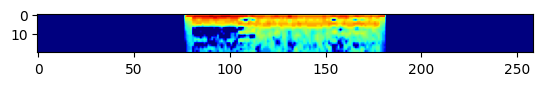

In [60]:
s_img = Image.open('/content/sample_data/mfcc_processed_images/226_1b1_Pl_sc_LittC2SE_1.png')
plt.imshow(s_img, cmap='jet')

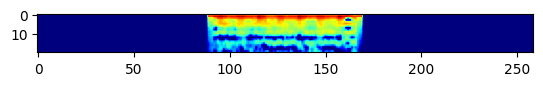

In [61]:
s_img = Image.open('/content/sample_data/mfcc_processed_images/101_1b1_Al_sc_Meditron_10.png')
plt.imshow(s_img, cmap='jet')

In [62]:
import cv2

In [63]:
def assign_img(path,file):
    
    image_data = []
    image_labels = []

    for idx,row in tqdm.tqdm(file.iterrows()):
        img = path + row['filename']
        image = cv2.imread(img)

        image_fromarray = Image.fromarray(image,'RGB')
        image_data.append(image)
        image_labels.append(row['disease'])

    return image_data,image_labels

In [64]:
mfcc_data,mfcc_labels = assign_img('/content/sample_data/mfcc_processed_images/',mfcc_list)

6898it [00:50, 136.90it/s]


In [65]:
print(mfcc_labels)

['URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COP

In [66]:
le = LabelEncoder()
le.fit(mfcc_labels)
mfcc_labels = le.transform(mfcc_labels)

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(mfcc_data,mfcc_labels,test_size = 0.3, random_state=143)

In [68]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded

In [131]:
mfcc_shape = feature_shape(X_train)
mfcc_shape

{(20, 259, 3),
 (20, 260, 3),
 (20, 262, 3),
 (20, 263, 3),
 (20, 264, 3),
 (20, 267, 3),
 (20, 268, 3),
 (20, 269, 3),
 (20, 270, 3),
 (20, 272, 3),
 (20, 273, 3),
 (20, 274, 3),
 (20, 276, 3),
 (20, 277, 3),
 (20, 278, 3),
 (20, 281, 3),
 (20, 284, 3),
 (20, 286, 3),
 (20, 287, 3),
 (20, 288, 3),
 (20, 295, 3),
 (20, 299, 3),
 (20, 300, 3),
 (20, 301, 3),
 (20, 302, 3),
 (20, 304, 3),
 (20, 309, 3),
 (20, 311, 3),
 (20, 314, 3),
 (20, 315, 3),
 (20, 329, 3),
 (20, 336, 3),
 (20, 338, 3),
 (20, 348, 3),
 (20, 351, 3),
 (20, 356, 3),
 (20, 357, 3),
 (20, 362, 3),
 (20, 370, 3),
 (20, 375, 3),
 (20, 397, 3),
 (20, 407, 3),
 (20, 428, 3),
 (20, 697, 3)}

In [70]:
mfcc_feature = feature_padding(X_train)

(259, 3) <class 'tuple'>


In [71]:
mfcc_feature = np.array(mfcc_feature)

In [72]:
mfcc_feature.shape

(4828, 20, 259, 3)

In [73]:
mfcc_test = feature_padding(X_test)

(259, 3) <class 'tuple'>


In [74]:
mfcc_test = np.array(mfcc_test)

In [75]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
),
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=1,
    mode="min",
    min_lr=0.00001,
)
]

In [76]:
mfcc_input=keras.layers.Input(shape=(20,259,3),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.Flatten()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [77]:
mfcc_model.summary()

Model: "mfccModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mfccInput (InputLayer)          │ (None, 20, 259, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 20, 87, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 20, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 11, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 11, 96)      │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 11, 96)      │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 5, 11, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 5, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,160 (375.62 KB)

 Trainable params: 95,520 (373.12 KB)

 Non-trainable params: 640 (2.50 KB)

In [78]:
input_mfcc=keras.layers.Input(shape=(20,259,3),name="mfcc")
mfcc=mfcc_model(input_mfcc)


hidden=keras.layers.Dropout(0.2)(mfcc)
hidden=keras.layers.Dense(50,activation='relu')(mfcc)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model(input_mfcc, output, name="Net")

In [79]:
print(type(mfcc))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [80]:
net.summary()

Model: "Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mfcc (InputLayer)               │ (None, 20, 259, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mfccModel (Functional)          │ (None, 1280)           │        96,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        64,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,693 (631.61 KB)

 Trainable params: 161,053 (629.11 KB)

 Non-trainable params: 640 (2.50 KB)

In [81]:
import keras
import tensorflow as tf

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

net.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# tf.keras.backend.set_value(net.optimizer.learning_rate, 0.001)


In [82]:
history=net.fit(mfcc_feature, Y_train,
    validation_data=(mfcc_test,Y_test),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)


Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.7948 - loss: 0.8757 - val_accuracy: 0.8338 - val_loss: 0.5789 - learning_rate: 0.0010
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8424 - loss: 0.5127 - val_accuracy: 0.8343 - val_loss: 0.5698 - learning_rate: 0.0010
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8371 - loss: 0.4874 - val_accuracy: 0.8517 - val_loss: 0.4600 - learning_rate: 0.0010
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8480 - loss: 0.4240 - val_accuracy: 0.8425 - val_loss: 1.1488 - learning_rate: 0.0010
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.8620 - loss: 0.3903 - val_accuracy: 0.8377 - val_loss: 0.5398 - learning_rate: 0.0010
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.8720 - loss: 0.3634 - val_accuracy: 0.8797 - val_loss: 0.3794 - learning_rate: 0.0010
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.8

In [83]:

# Save the model
net.save('lung_disease.keras')

In [84]:
y_pred = net.predict(mfcc_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

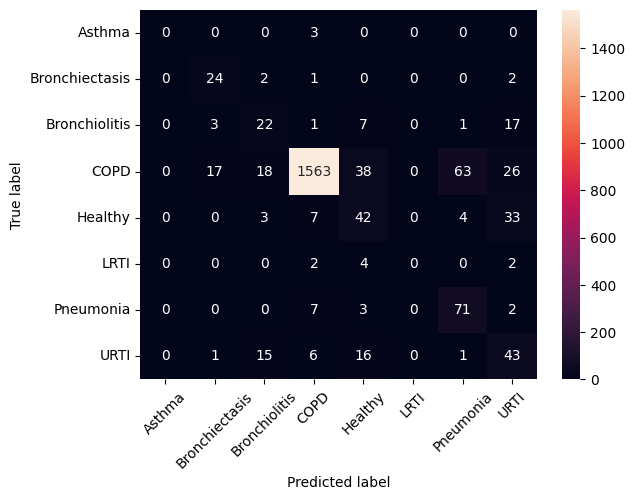

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = Y_test

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()

In [162]:
from sklearn.metrics import classification_report
y_true = Y_test
y_pred = net.predict(mfcc_test)
y_pred = np.argmax(y_pred, axis=1)
target_names = ['Asthma','Bronchiectasis','Bronchiolitis','COPD','Healthy','LRTI','Pneumonia','URTI']
print(classification_report(y_true, y_pred, target_names=target_names))






65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00         3
Bronchiectasis       0.53      0.83      0.65        29
 Bronchiolitis       0.37      0.43      0.40        51
          COPD       0.98      0.91      0.94      1725
       Healthy       0.38      0.47      0.42        89
          LRTI       0.00      0.00      0.00         8
     Pneumonia       0.51      0.86      0.64        83
          URTI       0.34      0.52      0.42        82

      accuracy                           0.85      2070
     macro avg       0.39      0.50      0.43      2070
  weighted avg       0.89      0.85      0.86      2070



c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [87]:
from sklearn.metrics import accuracy_score
def predict(x_test):
    y_pred = net.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(y_pred_classes)
    y_true = Y_test
    mapping = {
        0: 'Asthma',
        1: 'Bronchiectasis',
        2: 'Bronchiolitis',
        3: 'COPD',
        4: 'Healthy',
        5: 'LRTI',
        6: 'Pneumonia',
        7: 'URTI'
    }

    # Replace numerical labels with original labels
    predictions = [mapping[label] for label in y_pred_classes]
    accuracy = accuracy_score(y_true, y_pred_classes)
    print("Test Accuracy:", accuracy)
    
    return predictions


In [88]:
predict(mfcc_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[3 3 3 ... 3 3 3]
Test Accuracy: 0.8526570048309179


['COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Bronchiectasis',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'Healthy',
 'COPD',
 'Bronchiolitis',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Bronchiolitis',
 'COPD',
 'COPD',
 'COPD',
 'URTI',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'URTI',
 'COPD',
 'COPD',
 'COPD',
 'Healthy',
 'COPD',
 'COPD',
 'Pneumonia',
 'Healthy',
 'URTI',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Healthy',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',

In [90]:
import wave

with wave.open("C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files/117_1b2_Tc_mc_LittC2SE.wav") as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

print(duration)

20.0


In [91]:
def recording_to_clips(root, start, end, sr = 44100):

  maximum_index = len(root)
  start_index = min(int(start*sr), maximum_index)
  end_index = min(int(end*sr), maximum_index)
  return root[start_index:end_index]

In [93]:
shutil.rmtree('/content/sample_data/sample_clips/')

In [94]:
os.mkdir('/content/sample_data/sample_clips/')

In [95]:
def split_audio(duration,audio_path):
  i = 0
  n = 0
  max_length = 6
  start_time = 0
  end_time = max_length
  duml = 0
  if duration%max_length == 0:
    duml = int(duration / max_length)
  else:
    duml  = int(duration / max_length) + 1

  for j in range(duml):

    if end_time - start_time > max_length:
      end = start_time + max_length  
    
    filename = str(i) + '.wav'
    save_path = '/content/sample_data/sample_clips/'+filename
    n += 1
    i += 1

    audio, sample_rate = librosa.load(audio_path)
    sample = recording_to_clips(audio,start_time,end_time,sample_rate)

    required_length = max( 6*sample_rate, len(sample))
    padded_data = librosa.util.pad_center(sample,size = required_length)

    sf.write(file = save_path,data = padded_data, samplerate = sample_rate)

    start_time = end_time
    end_time += max_length
    
    # print('total files processed:', n)

In [96]:
audio_path = 'C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files/104_1b1_Ll_sc_Litt3200.wav'
split_audio(duration,audio_path)

In [97]:
sample_path = '/content/sample_data/sample_clips/'

In [98]:
cont = os.listdir(sample_path)
cont

['0.wav', '1.wav', '2.wav', '3.wav']

In [99]:
sample_data = pd.DataFrame(cont)

In [100]:
sample_data.columns = ['filename']

In [101]:
sample_data

,filename
0,0.wav
1,1.wav
2,2.wav
3,3.wav


In [102]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded



In [103]:
def get_features_from_audio(path):
    soundArr,sample_rate= librosa.load(path)
    mfcc=librosa.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=librosa.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=librosa.feature.melspectrogram(y=soundArr,sr=sample_rate)
    tone = librosa.feature.tonnetz(y=soundArr,sr=sample_rate)
    specCen = librosa.feature.spectral_centroid(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec,tone, specCen

In [104]:
os.mkdir('/content/sample_data/sample_processed_images')

In [105]:
def store_img(dir_path,feature,filename):
    s_img = librosa.power_to_db(feature)
    img = Image.fromarray(s_img)
    img = img.convert('L')
    img.save(os.path.join(dir_path,filename+'.png'))

In [107]:
root = '/content/sample_data/sample_clips/'
mfcc_dir = '/content/sample_data/sample_processed_images/'


for idx,row in tqdm.tqdm(sample_data.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    store_img(mfcc_dir,a,row['filename'].split('.')[0])

3it [00:00,  4.95it/s]c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
4it [00:00,  4.89it/s]


In [108]:
mfcc_content = os.listdir(mfcc_dir)

In [109]:
mfcc_content

['0.png', '1.png', '2.png', '3.png']

In [110]:
sample_images = pd.DataFrame(mfcc_content)

In [113]:
sample_images.columns = ['filename']

In [114]:
sample_images

,filename
0,0.png
1,1.png
2,2.png
3,3.png


In [121]:
sample_images.columns

Index(['filename'], dtype='object')

In [123]:
def assign_img1(path,file):
    
    image_data = []
  

    for idx,row in tqdm.tqdm(file.iterrows()):
        try:
            img = path + row['filename']
            image = cv2.imread(img)

            image_fromarray = Image.fromarray(image,'RGB')
            image_data.append(image_fromarray)
        except:
            print("error occurs")

      

    return image_data

In [126]:
sample_image_data = assign_img1('/content/sample_data/sample_processed_images/',sample_images)

4it [00:00, 205.39it/s]


In [127]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded

In [129]:
sample_shape = feature_shape(sample_image_data)
sample_shape

{(20, 259, 3)}

In [137]:
sample_feature = np.array(sample_image_data)

In [138]:
sample_feature = feature_padding(sample_feature)

(259, 3) <class 'tuple'>


In [139]:
sample_feature = np.array(sample_feature)

In [140]:
sample_feature.shape

(4, 20, 259, 3)

In [141]:
from sklearn.metrics import accuracy_score
def predict1(x_test):
    y_pred = net.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(y_pred_classes)
   
    mapping = {
        0: 'Asthma',
        1: 'Bronchiectasis',
        2: 'Bronchiolitis',
        3: 'COPD',
        4: 'Healthy',
        5: 'LRTI',
        6: 'Pneumonia',
        7: 'URTI'
    }

    # Replace numerical labels with original labels
    predictions = [mapping[label] for label in y_pred_classes]
   
    
    return predictions


In [142]:
predict1(sample_feature)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[3 3 3 3]


['COPD', 'COPD', 'COPD', 'COPD']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[3 3 3 3]


['COPD', 'COPD', 'COPD', 'COPD']

In [3]:
shutil.rmtree('/content/sample_data/mfcc_processed_images')

In [4]:
shutil.rmtree('/content/sample_data/processed_clips')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/sample_data/processed_clips'